$$\frac{d^2 \theta}{dt^2}= - \frac{g}{l}sen(\theta) - \beta \frac{d \theta}{dt}$$

$$ v_{n+1}=v_{n}- (\frac{g}{l}sen(\theta_ n) +\beta v_n) $$
$$ \theta_{n+1}=\theta_{n}+hv_n $$

Runge Kutta de Cuarto orden 

$$ k_1=hv(x_n,t_n)$$
$$ l_1= h f(x_n,v_n,t_n)$$
$$ k_2=h(v_n+ \frac{1}{2}l_1)$$
$$ l_2= h f(x_n +\frac{1}{2}k_1,v_n+\frac{1}{2}l_1,t_{n}+\frac{h}{2})$$
$$ k_3=h(v_n+\frac{1}{2}l_2)$$
$$ l_3= h f(x_n+\frac{1}{2}k_2,v_n+\frac{1}{2}l_2,t_{n}+\frac{h}{2}) $$
$$ k_4=h(v_n+l_3)$$
$$ l_4= h f(x_n+2k_3,v_n+2l_3,t_{n}+h) $$

$$x_{n+1}= x_n + \frac{1}{6}(k_1+2k_2+2k_3+k_4) $$
$$ v_{n+1}= v_n +\frac{1}{6}(l_1+2l_2+2l_3+l_4)$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from time import sleep

In [2]:
def f(theta,xi):
    return -(g/l)*np.sin(theta)-0.6*xi

In [3]:
h=0.01;
g=9.81;
l=0.5;
theta=np.pi/5;
xi=0.0;
n=1000
ls=n*[l]

In [4]:
def RK4(t,theta,xi,h):
    k1=h*xi
    l1=f(theta,xi)*h
    k2=h*(xi+l1/2)
    l2=f(theta+k1/2,xi+l1/2)*h
    k3=h*(xi+l2/2)
    l3=f(theta+k2/2,xi+l2/2)*h
    k4=h*(xi+l3)
    l4=f(theta+2*k3,xi+2*l3)*h
    xi=xi+(l1+2*l2+2*l3+l4)/2
    theta=theta+(k1+2*k2+2*k3+k4)/2
    x=l*np.cos(theta)
    y=-l*np.sin(theta)
    return x,y,theta,xi,t*h

In [5]:
xs=[];ys=[];thetas=[];xis=[];times=[]
for t in range(n):
    x, y, theta, xi, time = RK4(t, theta, xi, h)
    xs.append(x); ys.append(y);
    thetas.append(theta);xis.append(xi)
    times.append(time)

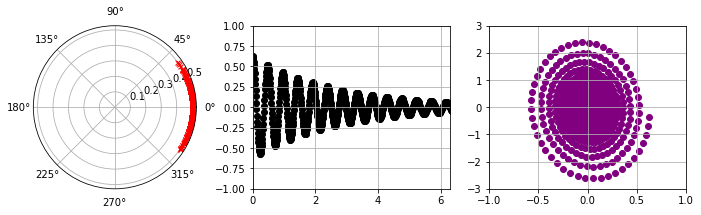

In [6]:
for i in range(1,len(xis),5):
    sleep(1)
    clear_output(wait=True)
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(1,3,2)
    ax2 = fig.add_subplot(1,3,3)
    ax0 = fig.add_subplot(1, 3, 1, projection='polar') # Añadir subplot polar
    ax0.plot(thetas[:i], ls[:i], marker="x", markersize=5, color="red") # Graficar datos en el subplot polar
    ax1.scatter(times[:i], thetas[:i], color="black")
    ax1.set_ylim(-1,1)
    ax1.set_xlim(0,2*np.pi)
    ax1.grid()
    ax2.scatter(thetas[:i], xis[:i], color="purple")
    ax2.set_xlim(-1,1)
    ax2.set_ylim(-3,3)
    ax2.grid()
    plt.draw()
    plt.show()